In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import f1_score, r2_score
import time
from sklearn.model_selection import (train_test_split, learning_curve, cross_val_score, cross_val_predict, 
ShuffleSplit, KFold)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# Print out a quick overview of the data
dataset=pd.read_csv("dataset.csv")
dataset.drop('URL', axis=1, inplace=True) # Drop the URL column since that is a unique column for training

# Take a look at any null values to clean up data, Likely need to do something with these empty datasets
dataset[pd.isnull(dataset).any(axis=1)]
dataset = dataset.interpolate() # Interpolate our data to get rid of null values
dataset['SERVER'].fillna('RARE_VALUE', inplace=True)  # For some reason there's still a isnull in the SERVER column

# will only convert string columns and leave all other columns unchanged
dataset_numerical = pd.get_dummies(dataset,prefix_sep='--') # Convert categorical columns to numbered categorical columns


In [27]:
#CREATING_LEARNING_CURVE_FUNCTION
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    plt.gca().invert_yaxis()
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [31]:
# Separate predictors and response
X = dataset_numerical.drop('Type',axis=1) #Predictors
y = dataset_numerical['Type']

X= X.astype(float)
y= y.astype(float)

rfe = RFE(LogisticRegression(solver='liblinear', max_iter=1000), n_features_to_select=10)
rfe.fit(X,y)

scores = []
for i in range(num_features):
    scores.append((rfe.ranking_[i],X.columns[i]))
    
print(scores)

[(675, 'URL_LENGTH'), (671, 'NUMBER_SPECIAL_CHARACTERS'), (1959, 'CONTENT_LENGTH'), (1589, 'TCP_CONVERSATION_EXCHANGE'), (183, 'DIST_REMOTE_TCP_PORT'), (1804, 'REMOTE_IPS'), (1788, 'APP_BYTES'), (1348, 'SOURCE_APP_PACKETS'), (1083, 'REMOTE_APP_PACKETS'), (1863, 'SOURCE_APP_BYTES'), (1787, 'REMOTE_APP_BYTES'), (1084, 'APP_PACKETS'), (181, 'DNS_QUERY_TIMES'), (416, 'CHARSET--ISO-8859'), (281, 'CHARSET--ISO-8859-1'), (1803, 'CHARSET--None'), (280, 'CHARSET--UTF-8'), (262, 'CHARSET--iso-8859-1'), (53, 'CHARSET--us-ascii'), (37, 'CHARSET--utf-8'), (80, 'CHARSET--windows-1251'), (479, 'CHARSET--windows-1252'), (1284, 'SERVER--.V01 Apache'), (1933, 'SERVER--294'), (355, 'SERVER--ATS'), (1078, 'SERVER--ATS/5.3.0'), (504, 'SERVER--Aeria Games & Entertainment'), (1770, 'SERVER--AkamaiGHost'), (617, 'SERVER--AmazonS3'), (611, 'SERVER--Apache'), (86, 'SERVER--Apache-Coyote/1.1'), (1455, 'SERVER--Apache/1.3.27 (Unix)  (Red-Hat/Linux) mod_perl/1.26 PHP/4.3.3 FrontPage/5.0.2 mod_ssl/2.8.12 OpenSSL/0.

In [ ]:
start = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Logistic Regression Classifier \n")
logit = LogisticRegression(solver='liblinear')
logit.fit(X_train, y_train)
print("Training Accuracy ",logit.score(X_train, y_train))

scores = cross_val_score(logit, X_train, y_train, cv=10)
print("Training Validated scores: Mean: %0.2f (+/- Std: %0.2f)" % (scores.mean(), scores.std() * 2))
print()

y_pred = logit.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print ("R2 Score:", accuracy)
print()

print("Predicted Accuracy score {:.4}%".format(accuracy_score(y_test, y_pred) * 100))
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print()    

end = time.time()
print("execution time is",end - start)

(1781, 1978)
(1781,)
Logistic Regression Classifier 

Training Accuracy  0.9360955056179775
Training Validated scores: Mean: 0.94 (+/- Std: 0.04)

R2 Score: 0.46094715168153744

Predicted Accuracy score 93.84%
Misclassified samples: 22

execution time is 1.1291530132293701


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

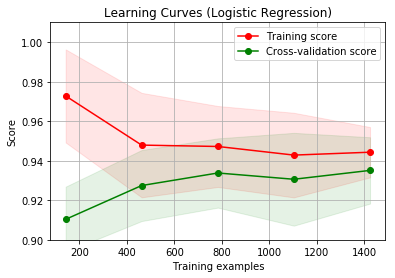

In [13]:
# Plot Graph
title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plot_learning_curve(logit, title, X, y, ylim=(0.9, 1.01), cv=cv, n_jobs=10)

In [10]:
# Visualize our results
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

print_score(logit,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9328

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       315
           1       0.82      0.55      0.66        42

   micro avg       0.93      0.93      0.93       357
   macro avg       0.88      0.77      0.81       357
weighted avg       0.93      0.93      0.93       357


Confusion Matrix:
[[310   5]
 [ 19  23]]

